### **Importing the simple and the minimum libraries**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn.datasets as skd

### **Making the architecture of weights, bias and activation functions**

In [2]:
def get_params(layers, eg, nodes, act_func):
  m = eg
  param = {}
  for i in range(1, layers+1):
    param["W"+str(i)] = np.random.randn(nodes[i], nodes[i-1])*0.05 # 0.01 can also be taken for more epochs and more layers
    param["b"+str(i)] = np.random.randn(nodes[i], m)*0
    param["act"+str(i)] = act_func[i]
  return param

## **Different activation functions used here with their derivatives**

In [3]:
# ReLu activation function
def relu(Z):
    return np.where(Z > 0, Z, Z * 0)

# Derivative of ReLu Function

def relu_deriv(Z):
    Z[Z<0] = 0
    Z[Z>=0] = 1
    return Z
    
# Sigmoid Activation Function

def sigmoid(Z):
    return 1/(1+np.exp(-Z))

# Derivative of Sigmoid function

def sigmoid_deriv(A):
    return sigmoid(A)*(1-sigmoid(A))

## **The Feed Forward Propagation**

### Single Feed Forward Propagation

In [4]:
def single_feed_forward(X, W, b, act_func):
    Z = np.dot(W, X)+b
    if(act_func == "sigmoid"):
        A = sigmoid(Z)
    else:
        A = relu(Z)
    return Z, A

### Full Feed Forward Propagation

In [5]:
def full_feed_forward(X, param):
    A = {}
    Z = {}

    A_temp = X
    A["A0"] = X
    for i in range(layers+1):
        if(i+1==layers+1):
            break
        else:
            Z_curr, A_curr = single_feed_forward(A_temp, param["W"+str(i+1)], param["b"+str(i+1)], param["act"+str(i+1)])
            Z["Z"+str(i+1)] = Z_curr
            A["A"+str(i+1)] = A_curr
            A_temp = A_curr
    return Z, A

## **The Cost Function (here used is: binary cross entropy)**

In [6]:
def cost(A, Y):
    m = A.shape[1]
    loss = -1/m * np.sum(np.multiply(Y, np.log(A)) + np.multiply(1-Y, np.log(1-A)))
    return loss

## **The Back Propagation**

### Back Propagation for a single Layer

In [7]:
def back_prop_single(n, W_curr, b_curr, Z_curr, A_prev, W_front, dZ_front, derivative, learning_rate):
    dZ = {}
    if(derivative=="relu_deriv"):
        act_deriv = relu_deriv
    else:
        act_deriv = sigmoid_deriv
    
    dZ_curr = np.dot(W_front.T, dZ_front)*act_deriv(Z_curr)
    dW_curr = 1/m*np.dot(dZ_curr, A_prev.T)
    db_curr = 1/m*np.sum(dZ_curr, axis = 1, keepdims=True)
    
    W_curr -=learning_rate*dW_curr
    b_curr -=learning_rate*db_curr
    
    dZ["dZ"+str(n)] = dZ_curr
    return W_curr,b_curr, dZ

### The Full Backward Propagation


In [8]:

def train(back_propm,m):
  learning_rate = back_prop["learning_rate"]
  epochs = back_prop["epochs"]
  layers = back_prop["layers"]
  Z = back_prop["Z"]
  A = back_prop["A"]
  param = back_prop["param"]
  Y = back_prop["truth_value"]
  m = back_prop["m"]
  LOSS = []
  ACC = []
  EPOCH = []
  for epoch in range(epochs):
    dZ = {}
    # trivial case (for the last layer)
    A_curr = A["A"+str(layers)]
    A_prev = A["A"+str(layers-1)]
    dZ_curr = A_curr-Y
    dW_curr = 1/m*(np.dot(dZ_curr, A_prev.T))
    db_curr = 1/m*(np.sum(dZ_curr, axis = 1, keepdims = True))
    
    param["W"+str(layers)]-=(learning_rate*dW_curr)
    param["b"+str(layers)]-=(learning_rate*db_curr)
    
    dZ["dZ"+str(layers)] = dZ_curr

    # Iterative process for all the previous Layers

    r = layers-1

    while(r>=1):
        W_curr = param["W"+str(r)]
        b_curr = param["b"+str(r)]
        Z_curr = Z["Z"+str(r)]
        A_prev = A["A"+str(r-1)]
        W_front = param["W"+str(r+1)]

        W_curr,b_curr, dZ = back_prop_single(r, W_curr, b_curr, Z_curr, A_prev, W_front, dZ["dZ"+str(r+1)], "sigmoid_deriv",0.03)
        r-=1

    Z, A = full_feed_forward(X, param)
    loss = cost(A["A"+str(len(A)-1)], Y)
    acc = (np.sum(np.round(A["A"+str(len(A)-1)])==Y))/m
    print("At epoch : ",epoch, "loss is :", loss, "  and accuracy is: ", acc)

    LOSS.append(loss)
    EPOCH.append(epoch)
    ACC.append(acc)
  return params, LOSS, ACC

## **Implementation of the full code above**

### **The Dataset**

#### Getting The dataset and X,Y

In [9]:
X = skd.load_breast_cancer()['data']
Y = skd.load_breast_cancer()['target']

X = X.T
Y = Y.T.reshape(1, len(Y))

# The no: of eg which will be used here

eg = Y.shape[1]

#### Defining the Layer architecture of the neural Net

In [10]:
layers  = 7
inp_nodes_in = X.shape[0]
inp_nodes_out = 2*(inp_nodes_in)+4

# making the nn_architecture taking less space

nodes = [inp_nodes_in, inp_nodes_out, 80, 70, 60, 40, 30, 1]
act_func = ["relu", "relu", "relu", "relu", "relu", "relu", "relu", "sigmoid"]

#### Getting The Parameters for the Feed Forward Propagation of the Neural Net

In [11]:
params = get_params(layers, eg, nodes, act_func)

#### The Feed Forward Propagation

In [12]:
Z, A = full_feed_forward(X, params)

#### Implementing Back Propagation

In [13]:
m = eg
back_prop = {"learning_rate": 0.03,
             "epochs": 4500,
             "layers": layers,
             "m": eg,
             "Z": Z,
             "A": A,
             "param": params,
             "truth_value": Y}


param, LOSS, ACC = train(back_prop,m)

At epoch :  0 loss is : 0.6938436292590251   and accuracy is:  0.6274165202108963
At epoch :  1 loss is : 0.6933755783490602   and accuracy is:  0.6274165202108963
At epoch :  2 loss is : 0.6929133278003724   and accuracy is:  0.6274165202108963
At epoch :  3 loss is : 0.6924567822083982   and accuracy is:  0.6274165202108963
At epoch :  4 loss is : 0.6920058512236755   and accuracy is:  0.6274165202108963
At epoch :  5 loss is : 0.6915604416648123   and accuracy is:  0.6274165202108963
At epoch :  6 loss is : 0.6911204629645656   and accuracy is:  0.6274165202108963
At epoch :  7 loss is : 0.6906858309950609   and accuracy is:  0.6274165202108963
At epoch :  8 loss is : 0.6902564624417826   and accuracy is:  0.6274165202108963
At epoch :  9 loss is : 0.6898322800657098   and accuracy is:  0.6274165202108963
At epoch :  10 loss is : 0.68941318165509   and accuracy is:  0.6274165202108963
At epoch :  11 loss is : 0.6889990875623462   and accuracy is:  0.6274165202108963
At epoch :  12 l

At epoch :  110 loss is : 0.6631426874333156   and accuracy is:  0.6274165202108963
At epoch :  111 loss is : 0.6629689847803183   and accuracy is:  0.6274165202108963
At epoch :  112 loss is : 0.6627972323511295   and accuracy is:  0.6274165202108963
At epoch :  113 loss is : 0.6626274691742257   and accuracy is:  0.6274165202108963
At epoch :  114 loss is : 0.6624594696201916   and accuracy is:  0.6274165202108963
At epoch :  115 loss is : 0.6622927424992213   and accuracy is:  0.6274165202108963
At epoch :  116 loss is : 0.6621274906666916   and accuracy is:  0.6274165202108963
At epoch :  117 loss is : 0.6619633765362262   and accuracy is:  0.6274165202108963
At epoch :  118 loss is : 0.661800152191749   and accuracy is:  0.6274165202108963
At epoch :  119 loss is : 0.6616377492828172   and accuracy is:  0.6274165202108963
At epoch :  120 loss is : 0.6614760432133181   and accuracy is:  0.6274165202108963
At epoch :  121 loss is : 0.6613149443436165   and accuracy is:  0.6274165202

At epoch :  228 loss is : 0.6424020769727496   and accuracy is:  0.6291739894551845
At epoch :  229 loss is : 0.6421731490838134   and accuracy is:  0.6291739894551845
At epoch :  230 loss is : 0.6419426789700008   and accuracy is:  0.6291739894551845
At epoch :  231 loss is : 0.641710685608118   and accuracy is:  0.6291739894551845
At epoch :  232 loss is : 0.6414771835516726   and accuracy is:  0.6291739894551845
At epoch :  233 loss is : 0.6412421061955391   and accuracy is:  0.6291739894551845
At epoch :  234 loss is : 0.6410053840935082   and accuracy is:  0.6291739894551845
At epoch :  235 loss is : 0.6407670809489373   and accuracy is:  0.6291739894551845
At epoch :  236 loss is : 0.6405272149429433   and accuracy is:  0.6291739894551845
At epoch :  237 loss is : 0.640285741711428   and accuracy is:  0.6291739894551845
At epoch :  238 loss is : 0.6400426500094405   and accuracy is:  0.6291739894551845
At epoch :  239 loss is : 0.6397978922340973   and accuracy is:  0.62917398945

At epoch :  329 loss is : 0.6104260560374474   and accuracy is:  0.6748681898066784
At epoch :  330 loss is : 0.6100227158620946   and accuracy is:  0.6766256590509666
At epoch :  331 loss is : 0.6096180502174706   and accuracy is:  0.6766256590509666
At epoch :  332 loss is : 0.6092121904639706   and accuracy is:  0.6783831282952548
At epoch :  333 loss is : 0.6088051459912305   and accuracy is:  0.680140597539543
At epoch :  334 loss is : 0.6083968584894662   and accuracy is:  0.6836555360281195
At epoch :  335 loss is : 0.6079874414492742   and accuracy is:  0.6854130052724078
At epoch :  336 loss is : 0.6075769470044936   and accuracy is:  0.687170474516696
At epoch :  337 loss is : 0.6071653487747082   and accuracy is:  0.6906854130052724
At epoch :  338 loss is : 0.6067526002618088   and accuracy is:  0.6942003514938488
At epoch :  339 loss is : 0.6063387437925896   and accuracy is:  0.6959578207381371
At epoch :  340 loss is : 0.6059237510143082   and accuracy is:  0.70123022847

At epoch :  434 loss is : 0.564884960111081   and accuracy is:  0.8260105448154658
At epoch :  435 loss is : 0.56444803856977   and accuracy is:  0.8260105448154658
At epoch :  436 loss is : 0.5640114018325502   and accuracy is:  0.8260105448154658
At epoch :  437 loss is : 0.5635750497123677   and accuracy is:  0.8260105448154658
At epoch :  438 loss is : 0.5631389800050757   and accuracy is:  0.827768014059754
At epoch :  439 loss is : 0.56270320971862   and accuracy is:  0.827768014059754
At epoch :  440 loss is : 0.5622677182404614   and accuracy is:  0.827768014059754
At epoch :  441 loss is : 0.5618325272129836   and accuracy is:  0.8295254833040422
At epoch :  442 loss is : 0.5613976393589308   and accuracy is:  0.8295254833040422
At epoch :  443 loss is : 0.5609630336143718   and accuracy is:  0.8295254833040422
At epoch :  444 loss is : 0.5605287209082764   and accuracy is:  0.8295254833040422
At epoch :  445 loss is : 0.5600946621938552   and accuracy is:  0.8295254833040422


At epoch :  547 loss is : 0.5176280195936145   and accuracy is:  0.859402460456942
At epoch :  548 loss is : 0.5172285422348324   and accuracy is:  0.859402460456942
At epoch :  549 loss is : 0.5168293644847763   and accuracy is:  0.859402460456942
At epoch :  550 loss is : 0.5164304329840503   and accuracy is:  0.859402460456942
At epoch :  551 loss is : 0.5160317518087129   and accuracy is:  0.859402460456942
At epoch :  552 loss is : 0.5156333054273933   and accuracy is:  0.859402460456942
At epoch :  553 loss is : 0.51523511457349   and accuracy is:  0.859402460456942
At epoch :  554 loss is : 0.5148371885117955   and accuracy is:  0.859402460456942
At epoch :  555 loss is : 0.5144395364569594   and accuracy is:  0.859402460456942
At epoch :  556 loss is : 0.5140421598451567   and accuracy is:  0.859402460456942
At epoch :  557 loss is : 0.5136450485366112   and accuracy is:  0.859402460456942
At epoch :  558 loss is : 0.5132481677698648   and accuracy is:  0.859402460456942
At epo

At epoch :  653 loss is : 0.4766851179550712   and accuracy is:  0.8629173989455184
At epoch :  654 loss is : 0.47631241100959637   and accuracy is:  0.8629173989455184
At epoch :  655 loss is : 0.47594000929296343   and accuracy is:  0.8629173989455184
At epoch :  656 loss is : 0.47556786238240395   and accuracy is:  0.8629173989455184
At epoch :  657 loss is : 0.4751959879314898   and accuracy is:  0.8629173989455184
At epoch :  658 loss is : 0.4748243887329636   and accuracy is:  0.8629173989455184
At epoch :  659 loss is : 0.47445305245901936   and accuracy is:  0.8629173989455184
At epoch :  660 loss is : 0.47408193386639624   and accuracy is:  0.8629173989455184
At epoch :  661 loss is : 0.47371108912244025   and accuracy is:  0.8629173989455184
At epoch :  662 loss is : 0.47334047960632014   and accuracy is:  0.8646748681898067
At epoch :  663 loss is : 0.4729700900663475   and accuracy is:  0.8646748681898067
At epoch :  664 loss is : 0.4725999030063924   and accuracy is:  0.86

At epoch :  755 loss is : 0.43999184762052096   and accuracy is:  0.8734622144112478
At epoch :  756 loss is : 0.43964554562449265   and accuracy is:  0.8734622144112478
At epoch :  757 loss is : 0.43929949312435823   and accuracy is:  0.8734622144112478
At epoch :  758 loss is : 0.43895371690807305   and accuracy is:  0.8734622144112478
At epoch :  759 loss is : 0.4386081914469702   and accuracy is:  0.8734622144112478
At epoch :  760 loss is : 0.4382628974067886   and accuracy is:  0.8734622144112478
At epoch :  761 loss is : 0.43791785046193743   and accuracy is:  0.8734622144112478
At epoch :  762 loss is : 0.4375729978168272   and accuracy is:  0.8734622144112478
At epoch :  763 loss is : 0.43722839657023865   and accuracy is:  0.8734622144112478
At epoch :  764 loss is : 0.43688404693526917   and accuracy is:  0.8734622144112478
At epoch :  765 loss is : 0.436540055163856   and accuracy is:  0.8734622144112478
At epoch :  766 loss is : 0.43619646921087   and accuracy is:  0.87346

At epoch :  873 loss is : 0.4010783689881683   and accuracy is:  0.8769771528998243
At epoch :  874 loss is : 0.4007659202357236   and accuracy is:  0.8769771528998243
At epoch :  875 loss is : 0.40045377179549524   and accuracy is:  0.8769771528998243
At epoch :  876 loss is : 0.4001419399530508   and accuracy is:  0.8769771528998243
At epoch :  877 loss is : 0.3998304703271465   and accuracy is:  0.8769771528998243
At epoch :  878 loss is : 0.3995194635136865   and accuracy is:  0.8769771528998243
At epoch :  879 loss is : 0.39920872771964533   and accuracy is:  0.8769771528998243
At epoch :  880 loss is : 0.39889829345317807   and accuracy is:  0.8769771528998243
At epoch :  881 loss is : 0.39858822704586183   and accuracy is:  0.8769771528998243
At epoch :  882 loss is : 0.39827843261837914   and accuracy is:  0.8769771528998243
At epoch :  883 loss is : 0.39796895237305707   and accuracy is:  0.8769771528998243
At epoch :  884 loss is : 0.3976596957483406   and accuracy is:  0.876

At epoch :  994 loss is : 0.3658393295120535   and accuracy is:  0.8875219683655536
At epoch :  995 loss is : 0.36557011556963165   and accuracy is:  0.8875219683655536
At epoch :  996 loss is : 0.36530126121315015   and accuracy is:  0.8875219683655536
At epoch :  997 loss is : 0.3650328530101277   and accuracy is:  0.8875219683655536
At epoch :  998 loss is : 0.3647647997456548   and accuracy is:  0.8875219683655536
At epoch :  999 loss is : 0.3644970441153105   and accuracy is:  0.8875219683655536
At epoch :  1000 loss is : 0.36422958918644244   and accuracy is:  0.8875219683655536
At epoch :  1001 loss is : 0.3639624158618995   and accuracy is:  0.8875219683655536
At epoch :  1002 loss is : 0.363695546518208   and accuracy is:  0.8875219683655536
At epoch :  1003 loss is : 0.3634290605005847   and accuracy is:  0.8875219683655536
At epoch :  1004 loss is : 0.36316289040738475   and accuracy is:  0.8875219683655536
At epoch :  1005 loss is : 0.36289708976051516   and accuracy is:  0

At epoch :  1097 loss is : 0.3399815732711895   and accuracy is:  0.8892794376098418
At epoch :  1098 loss is : 0.3397494066571484   and accuracy is:  0.8892794376098418
At epoch :  1099 loss is : 0.3395175849940348   and accuracy is:  0.8892794376098418
At epoch :  1100 loss is : 0.33928610309071994   and accuracy is:  0.8892794376098418
At epoch :  1101 loss is : 0.3390549368000463   and accuracy is:  0.8892794376098418
At epoch :  1102 loss is : 0.33882422963594727   and accuracy is:  0.8892794376098418
At epoch :  1103 loss is : 0.33859385725277824   and accuracy is:  0.8892794376098418
At epoch :  1104 loss is : 0.33836382961740674   and accuracy is:  0.8892794376098418
At epoch :  1105 loss is : 0.33813410477376404   and accuracy is:  0.8892794376098418
At epoch :  1106 loss is : 0.33790498841036415   and accuracy is:  0.8892794376098418
At epoch :  1107 loss is : 0.3376763041329054   and accuracy is:  0.8892794376098418
At epoch :  1108 loss is : 0.33744793680212254   and accura

At epoch :  1197 loss is : 0.31850325517415473   and accuracy is:  0.8945518453427065
At epoch :  1198 loss is : 0.31830442798315706   and accuracy is:  0.8945518453427065
At epoch :  1199 loss is : 0.3181058299029208   and accuracy is:  0.8945518453427065
At epoch :  1200 loss is : 0.31790749388406786   and accuracy is:  0.8945518453427065
At epoch :  1201 loss is : 0.3177093442124118   and accuracy is:  0.8945518453427065
At epoch :  1202 loss is : 0.3175114185759309   and accuracy is:  0.8945518453427065
At epoch :  1203 loss is : 0.31731373589315826   and accuracy is:  0.8945518453427065
At epoch :  1204 loss is : 0.3171162930760737   and accuracy is:  0.8945518453427065
At epoch :  1205 loss is : 0.31691917821774396   and accuracy is:  0.8945518453427065
At epoch :  1206 loss is : 0.3167222368414213   and accuracy is:  0.8945518453427065
At epoch :  1207 loss is : 0.316525444592311   and accuracy is:  0.8945518453427065
At epoch :  1208 loss is : 0.31632883201171963   and accuracy

At epoch :  1301 loss is : 0.2990332115156988   and accuracy is:  0.9015817223198594
At epoch :  1302 loss is : 0.29885737532226514   and accuracy is:  0.9015817223198594
At epoch :  1303 loss is : 0.2986816838863561   and accuracy is:  0.9015817223198594
At epoch :  1304 loss is : 0.2985061972796006   and accuracy is:  0.9015817223198594
At epoch :  1305 loss is : 0.29833081621675134   and accuracy is:  0.9015817223198594
At epoch :  1306 loss is : 0.29815562612102703   and accuracy is:  0.9015817223198594
At epoch :  1307 loss is : 0.297980498657305   and accuracy is:  0.9015817223198594
At epoch :  1308 loss is : 0.297805518571767   and accuracy is:  0.9015817223198594
At epoch :  1309 loss is : 0.29763076640368324   and accuracy is:  0.9015817223198594
At epoch :  1310 loss is : 0.29745616916260653   and accuracy is:  0.9015817223198594
At epoch :  1311 loss is : 0.29728173447619827   and accuracy is:  0.9015817223198594
At epoch :  1312 loss is : 0.2971075616550991   and accuracy 

At epoch :  1405 loss is : 0.28173999803132443   and accuracy is:  0.9068541300527241
At epoch :  1406 loss is : 0.2815832438335638   and accuracy is:  0.9068541300527241
At epoch :  1407 loss is : 0.2814266249368252   and accuracy is:  0.9068541300527241
At epoch :  1408 loss is : 0.2812701934996619   and accuracy is:  0.9068541300527241
At epoch :  1409 loss is : 0.2811138859166709   and accuracy is:  0.9068541300527241
At epoch :  1410 loss is : 0.2809577151984758   and accuracy is:  0.9068541300527241
At epoch :  1411 loss is : 0.280801660411402   and accuracy is:  0.9068541300527241
At epoch :  1412 loss is : 0.2806457452647926   and accuracy is:  0.9068541300527241
At epoch :  1413 loss is : 0.28048991583873145   and accuracy is:  0.9068541300527241
At epoch :  1414 loss is : 0.28033426696041724   and accuracy is:  0.9068541300527241
At epoch :  1415 loss is : 0.2801787735708483   and accuracy is:  0.9068541300527241
At epoch :  1416 loss is : 0.2800234831962546   and accuracy is

At epoch :  1514 loss is : 0.26556501092837165   and accuracy is:  0.9086115992970123
At epoch :  1515 loss is : 0.26542541340487236   and accuracy is:  0.9086115992970123
At epoch :  1516 loss is : 0.2652861935240117   and accuracy is:  0.9086115992970123
At epoch :  1517 loss is : 0.26514729355483113   and accuracy is:  0.9086115992970123
At epoch :  1518 loss is : 0.2650085490941816   and accuracy is:  0.9086115992970123
At epoch :  1519 loss is : 0.26486995689239357   and accuracy is:  0.9086115992970123
At epoch :  1520 loss is : 0.2647314950357765   and accuracy is:  0.9086115992970123
At epoch :  1521 loss is : 0.2645931925262587   and accuracy is:  0.9086115992970123
At epoch :  1522 loss is : 0.26445500769320857   and accuracy is:  0.9086115992970123
At epoch :  1523 loss is : 0.2643169780835592   and accuracy is:  0.9086115992970123
At epoch :  1524 loss is : 0.2641791706238167   and accuracy is:  0.9086115992970123
At epoch :  1525 loss is : 0.2640414716032194   and accuracy

At epoch :  1623 loss is : 0.2511630168608508   and accuracy is:  0.9191564147627417
At epoch :  1624 loss is : 0.2510333177985718   and accuracy is:  0.9191564147627417
At epoch :  1625 loss is : 0.2509035395342869   and accuracy is:  0.9191564147627417
At epoch :  1626 loss is : 0.25077353094153015   and accuracy is:  0.9191564147627417
At epoch :  1627 loss is : 0.2506435992529492   and accuracy is:  0.9191564147627417
At epoch :  1628 loss is : 0.2505138146829399   and accuracy is:  0.9191564147627417
At epoch :  1629 loss is : 0.2503842698177273   and accuracy is:  0.9191564147627417
At epoch :  1630 loss is : 0.25025518629836396   and accuracy is:  0.9191564147627417
At epoch :  1631 loss is : 0.25012640143393516   and accuracy is:  0.9191564147627417
At epoch :  1632 loss is : 0.24999779477463918   and accuracy is:  0.9191564147627417
At epoch :  1633 loss is : 0.2498694746392113   and accuracy is:  0.9191564147627417
At epoch :  1634 loss is : 0.24974110905969416   and accuracy

At epoch :  1736 loss is : 0.23781568419239774   and accuracy is:  0.9209138840070299
At epoch :  1737 loss is : 0.23770971556603734   and accuracy is:  0.9209138840070299
At epoch :  1738 loss is : 0.2376039197331538   and accuracy is:  0.9209138840070299
At epoch :  1739 loss is : 0.23749823449490995   and accuracy is:  0.9209138840070299
At epoch :  1740 loss is : 0.23739277340555312   and accuracy is:  0.9209138840070299
At epoch :  1741 loss is : 0.2372875064999994   and accuracy is:  0.9209138840070299
At epoch :  1742 loss is : 0.2371824019249549   and accuracy is:  0.9209138840070299
At epoch :  1743 loss is : 0.23707744199846256   and accuracy is:  0.9209138840070299
At epoch :  1744 loss is : 0.23697257670246075   and accuracy is:  0.9209138840070299
At epoch :  1745 loss is : 0.23686790407963218   and accuracy is:  0.9209138840070299
At epoch :  1746 loss is : 0.23676341408393453   and accuracy is:  0.9209138840070299
At epoch :  1747 loss is : 0.23665909851232322   and accu

At epoch :  1850 loss is : 0.22659812784151723   and accuracy is:  0.9244288224956063
At epoch :  1851 loss is : 0.22650774010453242   and accuracy is:  0.9244288224956063
At epoch :  1852 loss is : 0.22641750505419428   and accuracy is:  0.9244288224956063
At epoch :  1853 loss is : 0.22632738608904734   and accuracy is:  0.9244288224956063
At epoch :  1854 loss is : 0.22623743115958253   and accuracy is:  0.9244288224956063
At epoch :  1855 loss is : 0.22614766058784172   and accuracy is:  0.9244288224956063
At epoch :  1856 loss is : 0.2260580054863353   and accuracy is:  0.9244288224956063
At epoch :  1857 loss is : 0.22596851495602527   and accuracy is:  0.9244288224956063
At epoch :  1858 loss is : 0.225879152023915   and accuracy is:  0.9244288224956063
At epoch :  1859 loss is : 0.22578991636496598   and accuracy is:  0.9244288224956063
At epoch :  1860 loss is : 0.22570080678219961   and accuracy is:  0.9244288224956063
At epoch :  1861 loss is : 0.22561179920764404   and accu

At epoch :  1964 loss is : 0.21722310222399654   and accuracy is:  0.9226713532513181
At epoch :  1965 loss is : 0.21714867255228867   and accuracy is:  0.9226713532513181
At epoch :  1966 loss is : 0.21707434252032135   and accuracy is:  0.9226713532513181
At epoch :  1967 loss is : 0.21700020518991964   and accuracy is:  0.9226713532513181
At epoch :  1968 loss is : 0.21692613912176098   and accuracy is:  0.9226713532513181
At epoch :  1969 loss is : 0.21685218657289781   and accuracy is:  0.9226713532513181
At epoch :  1970 loss is : 0.2167783643714094   and accuracy is:  0.9226713532513181
At epoch :  1971 loss is : 0.21670461653616974   and accuracy is:  0.9226713532513181
At epoch :  1972 loss is : 0.21663082342863313   and accuracy is:  0.9226713532513181
At epoch :  1973 loss is : 0.21655704963194458   and accuracy is:  0.9226713532513181
At epoch :  1974 loss is : 0.2164832484615855   and accuracy is:  0.9226713532513181
At epoch :  1975 loss is : 0.2164095808457043   and accu

At epoch :  2069 loss is : 0.21003646003865378   and accuracy is:  0.9209138840070299
At epoch :  2070 loss is : 0.20997568066953867   and accuracy is:  0.9209138840070299
At epoch :  2071 loss is : 0.20991513435934692   and accuracy is:  0.9209138840070299
At epoch :  2072 loss is : 0.20985459961354036   and accuracy is:  0.9209138840070299
At epoch :  2073 loss is : 0.20979424369953753   and accuracy is:  0.9209138840070299
At epoch :  2074 loss is : 0.20973417914938342   and accuracy is:  0.9209138840070299
At epoch :  2075 loss is : 0.20967427534205357   and accuracy is:  0.9209138840070299
At epoch :  2076 loss is : 0.20961453915459002   and accuracy is:  0.9209138840070299
At epoch :  2077 loss is : 0.2095549265180957   and accuracy is:  0.9209138840070299
At epoch :  2078 loss is : 0.20949557331733987   and accuracy is:  0.9209138840070299
At epoch :  2079 loss is : 0.2094362835522403   and accuracy is:  0.9209138840070299
At epoch :  2080 loss is : 0.20937691390318977   and acc

At epoch :  2170 loss is : 0.2043021630899568   and accuracy is:  0.9209138840070299
At epoch :  2171 loss is : 0.20424820353005782   and accuracy is:  0.9209138840070299
At epoch :  2172 loss is : 0.20419467386643428   and accuracy is:  0.9209138840070299
At epoch :  2173 loss is : 0.2041414238466591   and accuracy is:  0.9209138840070299
At epoch :  2174 loss is : 0.20408835848102624   and accuracy is:  0.9209138840070299
At epoch :  2175 loss is : 0.20403564882507014   and accuracy is:  0.9209138840070299
At epoch :  2176 loss is : 0.20398173559806934   and accuracy is:  0.9209138840070299
At epoch :  2177 loss is : 0.203927978512028   and accuracy is:  0.9209138840070299
At epoch :  2178 loss is : 0.20387392058822904   and accuracy is:  0.9209138840070299
At epoch :  2179 loss is : 0.20382010285222799   and accuracy is:  0.9209138840070299
At epoch :  2180 loss is : 0.2037664212592961   and accuracy is:  0.9209138840070299
At epoch :  2181 loss is : 0.20371291380710344   and accura

At epoch :  2274 loss is : 0.1995035434154721   and accuracy is:  0.9209138840070299
At epoch :  2275 loss is : 0.19946639756172743   and accuracy is:  0.9209138840070299
At epoch :  2276 loss is : 0.19942937324505566   and accuracy is:  0.9209138840070299
At epoch :  2277 loss is : 0.19939258057738166   and accuracy is:  0.9209138840070299
At epoch :  2278 loss is : 0.19935607414256187   and accuracy is:  0.9209138840070299
At epoch :  2279 loss is : 0.19932018145224234   and accuracy is:  0.9209138840070299
At epoch :  2280 loss is : 0.19928442570011004   and accuracy is:  0.9209138840070299
At epoch :  2281 loss is : 0.19924876870785194   and accuracy is:  0.9209138840070299
At epoch :  2282 loss is : 0.19921353158612565   and accuracy is:  0.9209138840070299
At epoch :  2283 loss is : 0.1991783802698097   and accuracy is:  0.9209138840070299
At epoch :  2284 loss is : 0.19914330796043694   and accuracy is:  0.9209138840070299
At epoch :  2285 loss is : 0.1991084838711582   and accu

At epoch :  2379 loss is : 0.19667715644370298   and accuracy is:  0.9209138840070299
At epoch :  2380 loss is : 0.1966558821517068   and accuracy is:  0.9209138840070299
At epoch :  2381 loss is : 0.1966340186130129   and accuracy is:  0.9209138840070299
At epoch :  2382 loss is : 0.19661203576372915   and accuracy is:  0.9209138840070299
At epoch :  2383 loss is : 0.19659000677378252   and accuracy is:  0.9209138840070299
At epoch :  2384 loss is : 0.19656799826779917   and accuracy is:  0.9209138840070299
At epoch :  2385 loss is : 0.1965460728126822   and accuracy is:  0.9209138840070299
At epoch :  2386 loss is : 0.19652498413474143   and accuracy is:  0.9209138840070299
At epoch :  2387 loss is : 0.19650397946624168   and accuracy is:  0.9209138840070299
At epoch :  2388 loss is : 0.1964830052987104   and accuracy is:  0.9209138840070299
At epoch :  2389 loss is : 0.19646204128653166   and accuracy is:  0.9209138840070299
At epoch :  2390 loss is : 0.1964408040431482   and accura

At epoch :  2490 loss is : 0.1941829612979305   and accuracy is:  0.9226713532513181
At epoch :  2491 loss is : 0.19415955092527482   and accuracy is:  0.9226713532513181
At epoch :  2492 loss is : 0.19413617950846343   and accuracy is:  0.9226713532513181
At epoch :  2493 loss is : 0.19411282107713537   and accuracy is:  0.9226713532513181
At epoch :  2494 loss is : 0.19408949414895543   and accuracy is:  0.9226713532513181
At epoch :  2495 loss is : 0.1940662365395617   and accuracy is:  0.9226713532513181
At epoch :  2496 loss is : 0.19404318767825637   and accuracy is:  0.9226713532513181
At epoch :  2497 loss is : 0.19402016443893627   and accuracy is:  0.9226713532513181
At epoch :  2498 loss is : 0.1939972136635186   and accuracy is:  0.9226713532513181
At epoch :  2499 loss is : 0.19397429561636387   and accuracy is:  0.9226713532513181
At epoch :  2500 loss is : 0.1939516196194002   and accuracy is:  0.9226713532513181
At epoch :  2501 loss is : 0.19392902256262193   and accur

At epoch :  2591 loss is : 0.19193650911034318   and accuracy is:  0.9209138840070299
At epoch :  2592 loss is : 0.19191605338708068   and accuracy is:  0.9209138840070299
At epoch :  2593 loss is : 0.19189578878463168   and accuracy is:  0.9209138840070299
At epoch :  2594 loss is : 0.19187557564138205   and accuracy is:  0.9209138840070299
At epoch :  2595 loss is : 0.19185535557532646   and accuracy is:  0.9209138840070299
At epoch :  2596 loss is : 0.19183515650769822   and accuracy is:  0.9209138840070299
At epoch :  2597 loss is : 0.19181493899989727   and accuracy is:  0.9209138840070299
At epoch :  2598 loss is : 0.19179473776054087   and accuracy is:  0.9209138840070299
At epoch :  2599 loss is : 0.1917745513969964   and accuracy is:  0.9209138840070299
At epoch :  2600 loss is : 0.19175443236757997   and accuracy is:  0.9209138840070299
At epoch :  2601 loss is : 0.19173434439003495   and accuracy is:  0.9209138840070299
At epoch :  2602 loss is : 0.1917142976615064   and acc

At epoch :  2699 loss is : 0.18986176933459628   and accuracy is:  0.9226713532513181
At epoch :  2700 loss is : 0.18984312997347708   and accuracy is:  0.9226713532513181
At epoch :  2701 loss is : 0.18982452180626935   and accuracy is:  0.9226713532513181
At epoch :  2702 loss is : 0.189805954595078   and accuracy is:  0.9226713532513181
At epoch :  2703 loss is : 0.18978742772081206   and accuracy is:  0.9226713532513181
At epoch :  2704 loss is : 0.1897689239554836   and accuracy is:  0.9226713532513181
At epoch :  2705 loss is : 0.18975041738685663   and accuracy is:  0.9226713532513181
At epoch :  2706 loss is : 0.18973191023505098   and accuracy is:  0.9226713532513181
At epoch :  2707 loss is : 0.18971336328931895   and accuracy is:  0.9226713532513181
At epoch :  2708 loss is : 0.18969481102595523   and accuracy is:  0.9226713532513181
At epoch :  2709 loss is : 0.18967627829005254   and accuracy is:  0.9226713532513181
At epoch :  2710 loss is : 0.18965776768251175   and accu

At epoch :  2811 loss is : 0.18793098651777165   and accuracy is:  0.9244288224956063
At epoch :  2812 loss is : 0.18791511333185434   and accuracy is:  0.9244288224956063
At epoch :  2813 loss is : 0.1878992322698562   and accuracy is:  0.9244288224956063
At epoch :  2814 loss is : 0.1878833875574066   and accuracy is:  0.9244288224956063
At epoch :  2815 loss is : 0.187867567879311   and accuracy is:  0.9244288224956063
At epoch :  2816 loss is : 0.18785176886253957   and accuracy is:  0.9244288224956063
At epoch :  2817 loss is : 0.1878359883446698   and accuracy is:  0.9244288224956063
At epoch :  2818 loss is : 0.187820222476742   and accuracy is:  0.9244288224956063
At epoch :  2819 loss is : 0.18780447681645135   and accuracy is:  0.9244288224956063
At epoch :  2820 loss is : 0.1877887509034414   and accuracy is:  0.9244288224956063
At epoch :  2821 loss is : 0.1877730715410209   and accuracy is:  0.9244288224956063
At epoch :  2822 loss is : 0.18775741395003173   and accuracy i

At epoch :  2919 loss is : 0.1863063704828015   and accuracy is:  0.9261862917398945
At epoch :  2920 loss is : 0.1862923959184488   and accuracy is:  0.9261862917398945
At epoch :  2921 loss is : 0.1862784715928987   and accuracy is:  0.9261862917398945
At epoch :  2922 loss is : 0.18626457795195006   and accuracy is:  0.9261862917398945
At epoch :  2923 loss is : 0.18625066651691125   and accuracy is:  0.9261862917398945
At epoch :  2924 loss is : 0.1862367971407248   and accuracy is:  0.9261862917398945
At epoch :  2925 loss is : 0.1862229799605581   and accuracy is:  0.9261862917398945
At epoch :  2926 loss is : 0.18620917062807102   and accuracy is:  0.9261862917398945
At epoch :  2927 loss is : 0.18619536718206356   and accuracy is:  0.9261862917398945
At epoch :  2928 loss is : 0.18618157573159957   and accuracy is:  0.9261862917398945
At epoch :  2929 loss is : 0.18616780846245054   and accuracy is:  0.9261862917398945
At epoch :  2930 loss is : 0.18615405595765258   and accura

At epoch :  3028 loss is : 0.1849141446707659   and accuracy is:  0.9244288224956063
At epoch :  3029 loss is : 0.1849027378340462   and accuracy is:  0.9244288224956063
At epoch :  3030 loss is : 0.1848913304451721   and accuracy is:  0.9244288224956063
At epoch :  3031 loss is : 0.1848799301385052   and accuracy is:  0.9244288224956063
At epoch :  3032 loss is : 0.18486854508367345   and accuracy is:  0.9244288224956063
At epoch :  3033 loss is : 0.18485722173119778   and accuracy is:  0.9244288224956063
At epoch :  3034 loss is : 0.18484592697118601   and accuracy is:  0.9244288224956063
At epoch :  3035 loss is : 0.18483467638663345   and accuracy is:  0.9244288224956063
At epoch :  3036 loss is : 0.18482349456209368   and accuracy is:  0.9244288224956063
At epoch :  3037 loss is : 0.18481233361408803   and accuracy is:  0.9244288224956063
At epoch :  3038 loss is : 0.18480118940154042   and accuracy is:  0.9244288224956063
At epoch :  3039 loss is : 0.1847900632994869   and accura

At epoch :  3135 loss is : 0.18382293966032404   and accuracy is:  0.9244288224956063
At epoch :  3136 loss is : 0.18381374238155285   and accuracy is:  0.9244288224956063
At epoch :  3137 loss is : 0.1838045956954197   and accuracy is:  0.9244288224956063
At epoch :  3138 loss is : 0.18379548509915716   and accuracy is:  0.9244288224956063
At epoch :  3139 loss is : 0.18378640624776268   and accuracy is:  0.9244288224956063
At epoch :  3140 loss is : 0.18377736823988433   and accuracy is:  0.9244288224956063
At epoch :  3141 loss is : 0.18376836243171712   and accuracy is:  0.9244288224956063
At epoch :  3142 loss is : 0.18375936875136098   and accuracy is:  0.9244288224956063
At epoch :  3143 loss is : 0.18375040623618222   and accuracy is:  0.9244288224956063
At epoch :  3144 loss is : 0.1837414870743151   and accuracy is:  0.9244288224956063
At epoch :  3145 loss is : 0.18373258764912812   and accuracy is:  0.9244288224956063
At epoch :  3146 loss is : 0.18372370747884625   and acc

At epoch :  3247 loss is : 0.182904901747646   and accuracy is:  0.9279437609841827
At epoch :  3248 loss is : 0.18289805766395006   and accuracy is:  0.9279437609841827
At epoch :  3249 loss is : 0.18289121871704342   and accuracy is:  0.9279437609841827
At epoch :  3250 loss is : 0.1828844087163879   and accuracy is:  0.9279437609841827
At epoch :  3251 loss is : 0.18287766599053915   and accuracy is:  0.9279437609841827
At epoch :  3252 loss is : 0.18287083392327497   and accuracy is:  0.9279437609841827
At epoch :  3253 loss is : 0.18286396555003745   and accuracy is:  0.9279437609841827
At epoch :  3254 loss is : 0.18285712287129624   and accuracy is:  0.9279437609841827
At epoch :  3255 loss is : 0.18285029450903356   and accuracy is:  0.9279437609841827
At epoch :  3256 loss is : 0.18284347750402657   and accuracy is:  0.9279437609841827
At epoch :  3257 loss is : 0.18283667380230426   and accuracy is:  0.9279437609841827
At epoch :  3258 loss is : 0.1828298847962355   and accur

At epoch :  3356 loss is : 0.18217306996378904   and accuracy is:  0.9279437609841827
At epoch :  3357 loss is : 0.18216701602104324   and accuracy is:  0.9279437609841827
At epoch :  3358 loss is : 0.18216102221677857   and accuracy is:  0.9279437609841827
At epoch :  3359 loss is : 0.182155114862646   and accuracy is:  0.9279437609841827
At epoch :  3360 loss is : 0.18214944401432145   and accuracy is:  0.9279437609841827
At epoch :  3361 loss is : 0.18214379954089813   and accuracy is:  0.929701230228471
At epoch :  3362 loss is : 0.18213816729303142   and accuracy is:  0.929701230228471
At epoch :  3363 loss is : 0.18213254211727864   and accuracy is:  0.929701230228471
At epoch :  3364 loss is : 0.18212696723144764   and accuracy is:  0.929701230228471
At epoch :  3365 loss is : 0.1821214239751166   and accuracy is:  0.929701230228471
At epoch :  3366 loss is : 0.18211588690111719   and accuracy is:  0.929701230228471
At epoch :  3367 loss is : 0.18211036391346325   and accuracy i

At epoch :  3466 loss is : 0.18150476133225957   and accuracy is:  0.9314586994727593
At epoch :  3467 loss is : 0.18149730523405289   and accuracy is:  0.9314586994727593
At epoch :  3468 loss is : 0.1814899137719906   and accuracy is:  0.9314586994727593
At epoch :  3469 loss is : 0.18148258948853632   and accuracy is:  0.9314586994727593
At epoch :  3470 loss is : 0.18147526687962873   and accuracy is:  0.9314586994727593
At epoch :  3471 loss is : 0.18146803481800763   and accuracy is:  0.9314586994727593
At epoch :  3472 loss is : 0.18146079049930258   and accuracy is:  0.9314586994727593
At epoch :  3473 loss is : 0.18145352906669177   and accuracy is:  0.9314586994727593
At epoch :  3474 loss is : 0.1814462533478009   and accuracy is:  0.9314586994727593
At epoch :  3475 loss is : 0.18143897127331163   and accuracy is:  0.9314586994727593
At epoch :  3476 loss is : 0.18143169101614928   and accuracy is:  0.9314586994727593
At epoch :  3477 loss is : 0.18142442539499645   and acc

At epoch :  3578 loss is : 0.1807914875866315   and accuracy is:  0.9314586994727593
At epoch :  3579 loss is : 0.18078634118612807   and accuracy is:  0.9314586994727593
At epoch :  3580 loss is : 0.18078124231833018   and accuracy is:  0.9314586994727593
At epoch :  3581 loss is : 0.1807762297513444   and accuracy is:  0.9314586994727593
At epoch :  3582 loss is : 0.18077127848465016   and accuracy is:  0.9314586994727593
At epoch :  3583 loss is : 0.18076633521060237   and accuracy is:  0.9314586994727593
At epoch :  3584 loss is : 0.18076140069585264   and accuracy is:  0.9314586994727593
At epoch :  3585 loss is : 0.18075633976157277   and accuracy is:  0.9314586994727593
At epoch :  3586 loss is : 0.1807512989316636   and accuracy is:  0.9314586994727593
At epoch :  3587 loss is : 0.18074626989592232   and accuracy is:  0.9314586994727593
At epoch :  3588 loss is : 0.18074125612163505   and accuracy is:  0.9314586994727593
At epoch :  3589 loss is : 0.18073625285414674   and accu

At epoch :  3691 loss is : 0.18022977130004975   and accuracy is:  0.9314586994727593
At epoch :  3692 loss is : 0.180224265915153   and accuracy is:  0.9314586994727593
At epoch :  3693 loss is : 0.18021850944839   and accuracy is:  0.9314586994727593
At epoch :  3694 loss is : 0.1802127332660863   and accuracy is:  0.9314586994727593
At epoch :  3695 loss is : 0.1802069254517659   and accuracy is:  0.9314586994727593
At epoch :  3696 loss is : 0.1802011355977331   and accuracy is:  0.9314586994727593
At epoch :  3697 loss is : 0.18019535685460183   and accuracy is:  0.9314586994727593
At epoch :  3698 loss is : 0.18018962202160732   and accuracy is:  0.9314586994727593
At epoch :  3699 loss is : 0.18018387660750942   and accuracy is:  0.9314586994727593
At epoch :  3700 loss is : 0.1801781351365384   and accuracy is:  0.9314586994727593
At epoch :  3701 loss is : 0.18017252690099683   and accuracy is:  0.9314586994727593
At epoch :  3702 loss is : 0.18016688407643466   and accuracy i

At epoch :  3804 loss is : 0.17962690253566416   and accuracy is:  0.929701230228471
At epoch :  3805 loss is : 0.1796221814707702   and accuracy is:  0.929701230228471
At epoch :  3806 loss is : 0.1796172314895457   and accuracy is:  0.929701230228471
At epoch :  3807 loss is : 0.1796120402787472   and accuracy is:  0.929701230228471
At epoch :  3808 loss is : 0.17960680484581762   and accuracy is:  0.929701230228471
At epoch :  3809 loss is : 0.1796015536082291   and accuracy is:  0.929701230228471
At epoch :  3810 loss is : 0.17959630126295623   and accuracy is:  0.929701230228471
At epoch :  3811 loss is : 0.1795910583653172   and accuracy is:  0.929701230228471
At epoch :  3812 loss is : 0.17958563348079662   and accuracy is:  0.929701230228471
At epoch :  3813 loss is : 0.17958012006140595   and accuracy is:  0.929701230228471
At epoch :  3814 loss is : 0.1795746005930791   and accuracy is:  0.929701230228471
At epoch :  3815 loss is : 0.17956909259267018   and accuracy is:  0.92

At epoch :  3916 loss is : 0.17908181568752898   and accuracy is:  0.929701230228471
At epoch :  3917 loss is : 0.17907855136809553   and accuracy is:  0.929701230228471
At epoch :  3918 loss is : 0.17907526780163582   and accuracy is:  0.929701230228471
At epoch :  3919 loss is : 0.17907195238395807   and accuracy is:  0.929701230228471
At epoch :  3920 loss is : 0.17906863159909497   and accuracy is:  0.929701230228471
At epoch :  3921 loss is : 0.17906559607887823   and accuracy is:  0.929701230228471
At epoch :  3922 loss is : 0.17906258195763974   and accuracy is:  0.929701230228471
At epoch :  3923 loss is : 0.1790595098161621   and accuracy is:  0.929701230228471
At epoch :  3924 loss is : 0.17905640251155264   and accuracy is:  0.929701230228471
At epoch :  3925 loss is : 0.1790533680679926   and accuracy is:  0.929701230228471
At epoch :  3926 loss is : 0.17905036905488889   and accuracy is:  0.929701230228471
At epoch :  3927 loss is : 0.17904739207292214   and accuracy is:  

At epoch :  4028 loss is : 0.17893029164030058   and accuracy is:  0.929701230228471
At epoch :  4029 loss is : 0.1789303570495048   and accuracy is:  0.929701230228471
At epoch :  4030 loss is : 0.17893044100704533   and accuracy is:  0.929701230228471
At epoch :  4031 loss is : 0.17893089874732923   and accuracy is:  0.929701230228471
At epoch :  4032 loss is : 0.178931386618794   and accuracy is:  0.929701230228471
At epoch :  4033 loss is : 0.17893194935701145   and accuracy is:  0.929701230228471
At epoch :  4034 loss is : 0.1789325067980682   and accuracy is:  0.9314586994727593
At epoch :  4035 loss is : 0.17893298384997772   and accuracy is:  0.9314586994727593
At epoch :  4036 loss is : 0.17893321853485059   and accuracy is:  0.9314586994727593
At epoch :  4037 loss is : 0.1789335084785344   and accuracy is:  0.9314586994727593
At epoch :  4038 loss is : 0.17893385565803566   and accuracy is:  0.9314586994727593
At epoch :  4039 loss is : 0.17893424319625664   and accuracy is:

At epoch :  4142 loss is : 0.17902906067416782   and accuracy is:  0.9314586994727593
At epoch :  4143 loss is : 0.17903083750440438   and accuracy is:  0.9314586994727593
At epoch :  4144 loss is : 0.1790329160842243   and accuracy is:  0.9314586994727593
At epoch :  4145 loss is : 0.17903519794495382   and accuracy is:  0.9314586994727593
At epoch :  4146 loss is : 0.17903812596666643   and accuracy is:  0.9314586994727593
At epoch :  4147 loss is : 0.1790421268964098   and accuracy is:  0.9314586994727593
At epoch :  4148 loss is : 0.1790460310464995   and accuracy is:  0.9314586994727593
At epoch :  4149 loss is : 0.17905001329096368   and accuracy is:  0.9314586994727593
At epoch :  4150 loss is : 0.17905392509972126   and accuracy is:  0.9314586994727593
At epoch :  4151 loss is : 0.17905791395939671   and accuracy is:  0.9314586994727593
At epoch :  4152 loss is : 0.17906229470116916   and accuracy is:  0.9314586994727593
At epoch :  4153 loss is : 0.1790665882932779   and accur

At epoch :  4250 loss is : 0.17922560153825742   and accuracy is:  0.929701230228471
At epoch :  4251 loss is : 0.17922675135637256   and accuracy is:  0.929701230228471
At epoch :  4252 loss is : 0.17922793690273783   and accuracy is:  0.929701230228471
At epoch :  4253 loss is : 0.17922913526715145   and accuracy is:  0.929701230228471
At epoch :  4254 loss is : 0.1792303368565554   and accuracy is:  0.929701230228471
At epoch :  4255 loss is : 0.17923149934126628   and accuracy is:  0.929701230228471
At epoch :  4256 loss is : 0.17923258701161665   and accuracy is:  0.929701230228471
At epoch :  4257 loss is : 0.17923363994081395   and accuracy is:  0.929701230228471
At epoch :  4258 loss is : 0.17923467904816748   and accuracy is:  0.929701230228471
At epoch :  4259 loss is : 0.17923542708482132   and accuracy is:  0.929701230228471
At epoch :  4260 loss is : 0.17923620189645736   and accuracy is:  0.9314586994727593
At epoch :  4261 loss is : 0.17923698946172567   and accuracy is:

At epoch :  4361 loss is : 0.17913540300249825   and accuracy is:  0.9314586994727593
At epoch :  4362 loss is : 0.17913259164482923   and accuracy is:  0.9314586994727593
At epoch :  4363 loss is : 0.17912971438883732   and accuracy is:  0.9314586994727593
At epoch :  4364 loss is : 0.1791267487999159   and accuracy is:  0.9314586994727593
At epoch :  4365 loss is : 0.17912377811347333   and accuracy is:  0.9314586994727593
At epoch :  4366 loss is : 0.17912121725465951   and accuracy is:  0.9314586994727593
At epoch :  4367 loss is : 0.17911887736990909   and accuracy is:  0.9314586994727593
At epoch :  4368 loss is : 0.1791165338165085   and accuracy is:  0.9314586994727593
At epoch :  4369 loss is : 0.17911420954844237   and accuracy is:  0.9314586994727593
At epoch :  4370 loss is : 0.17911221892217064   and accuracy is:  0.9314586994727593
At epoch :  4371 loss is : 0.17911020021045015   and accuracy is:  0.9314586994727593
At epoch :  4372 loss is : 0.17910762967097227   and acc

At epoch :  4471 loss is : 0.17863988531416575   and accuracy is:  0.9314586994727593
At epoch :  4472 loss is : 0.178632479993035   and accuracy is:  0.9314586994727593
At epoch :  4473 loss is : 0.178625081754257   and accuracy is:  0.9314586994727593
At epoch :  4474 loss is : 0.17861773650131965   and accuracy is:  0.9314586994727593
At epoch :  4475 loss is : 0.1786103920908244   and accuracy is:  0.9314586994727593
At epoch :  4476 loss is : 0.17860305727806175   and accuracy is:  0.9314586994727593
At epoch :  4477 loss is : 0.1785957352692342   and accuracy is:  0.9314586994727593
At epoch :  4478 loss is : 0.17858851674521778   and accuracy is:  0.9314586994727593
At epoch :  4479 loss is : 0.17858132514734612   and accuracy is:  0.9314586994727593
At epoch :  4480 loss is : 0.1785743175170431   and accuracy is:  0.9314586994727593
At epoch :  4481 loss is : 0.17856874801745562   and accuracy is:  0.9314586994727593
At epoch :  4482 loss is : 0.17856348456748725   and accuracy

#### Plotting the LOSS, ACC curve

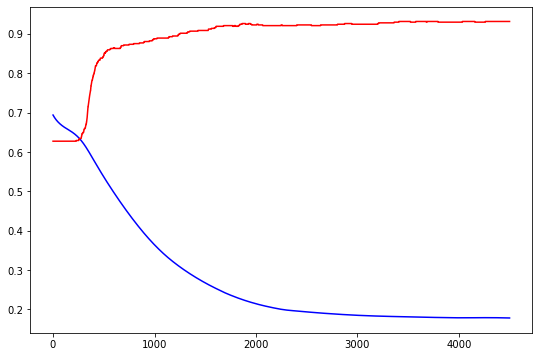

In [14]:
plt.figure(figsize=(9,6))
plt.plot(LOSS, color = "blue")
plt.plot(ACC, color = "red")

#### Getting The Accuracy Metrics 

In [15]:
print("The final loss is : ", LOSS[len(LOSS)-1]*100,"%",  "and the accuracy is: ", ACC[len(ACC)-1]*100, "%")

The final loss is :  17.84758387142605 % and the accuracy is:  93.14586994727593 %
